In [16]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import tool

In [17]:
#read
CPBL_data = pd.read_excel("CPBL_batter.xlsx")
MLB_data = pd.read_excel("MLB_batter.xlsx")


In [18]:
#first view
CPBL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   球員      163 non-null    object 
 1   隊伍      163 non-null    object 
 2   背號      163 non-null    int64  
 3   PA      163 non-null    int64  
 4   AVG     163 non-null    float64
 5   OBP     163 non-null    float64
 6   SLG     163 non-null    float64
 7   ISO     163 non-null    float64
 8   BABIP   161 non-null    float64
 9   BIP%    163 non-null    float64
 10  OPS     163 non-null    float64
 11  OPS+    163 non-null    float64
 12  tOPS+   163 non-null    float64
 13  RC      163 non-null    float64
 14  wOBA    163 non-null    float64
 15  BB%     163 non-null    float64
 16  BB/K    160 non-null    float64
 17  K%      163 non-null    float64
dtypes: float64(14), int64(2), object(2)
memory usage: 23.1+ KB


In [19]:
MLB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    145 non-null    object 
 1   Team    145 non-null    object 
 2   G       145 non-null    int64  
 3   PA      145 non-null    int64  
 4   HR      145 non-null    int64  
 5   R       145 non-null    int64  
 6   RBI     145 non-null    int64  
 7   SB      145 non-null    int64  
 8   BB%     145 non-null    float64
 9   K%      145 non-null    float64
 10  ISO     145 non-null    float64
 11  BABIP   145 non-null    float64
 12  AVG     145 non-null    float64
 13  OBP     145 non-null    float64
 14  SLG     145 non-null    float64
 15  wOBA    145 non-null    float64
 16  xwOBA   145 non-null    float64
 17  wRC+    145 non-null    int64  
 18  BsR     145 non-null    float64
 19  Off     145 non-null    float64
 20  Def     145 non-null    float64
 21  WAR     145 non-null    float64
dtypes:

In [20]:
df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    145 non-null    object 
 1   Team    145 non-null    object 
 2   G       145 non-null    float64
 3   PA      308 non-null    int64  
 4   HR      145 non-null    float64
 5   R       145 non-null    float64
 6   RBI     145 non-null    float64
 7   SB      145 non-null    float64
 8   BB%     308 non-null    float64
 9   K%      308 non-null    float64
 10  ISO     308 non-null    float64
 11  BABIP   306 non-null    float64
 12  AVG     308 non-null    float64
 13  OBP     308 non-null    float64
 14  SLG     308 non-null    float64
 15  wOBA    308 non-null    float64
 16  xwOBA   145 non-null    float64
 17  wRC+    145 non-null    float64
 18  BsR     145 non-null    float64
 19  Off     145 non-null    float64
 20  Def     145 non-null    float64
 21  WAR     145 non-null    float64
 22  球員

In [21]:
#check column
same_col = set(CPBL_data.columns) & set(MLB_data.columns)
diff_col = set(CPBL_data.columns) ^ set(MLB_data.columns)
print("same column: ", same_col, "\ndiff. column: ", diff_col)


same column:  {'ISO', 'BB%', 'AVG', 'BABIP', 'OBP', 'wOBA', 'SLG', 'PA', 'K%'} 
diff. column:  {'隊伍', 'tOPS+', 'xwOBA', 'OPS', 'HR', 'RBI', 'R', 'BIP%', 'OPS+', 'wRC+', 'WAR', 'Team', '背號', 'BB/K', 'G', 'SB', 'Off', '球員', 'Name', 'Def', 'BsR', 'RC'}


In [22]:
#data clean
Scale = 1.232
CPBL_data.drop(columns=['BB/K','OPS','tOPS+','RC'], inplace=True)
MLB_data.drop(columns=['G','WAR','xwOBA','Def','SB'], inplace=True)
MLB_data['OPS+'] = 100 * (MLB_data['OBP']/MLB_data['OBP'].mean() + (MLB_data['SLG']/MLB_data['SLG'].mean()) - 1)
CPBL_data['Off'] = (CPBL_data['wOBA']-CPBL_data['wOBA'].mean()/Scale) - CPBL_data['PA']
CPBL_data.rename(columns={
    '球員': 'Name',
    '背號': 'Num',
    '隊伍': 'Team'
}, inplace=True)



df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)


In [23]:
oe = OrdinalEncoder()
df['Num_Ordi'] = oe.fit_transform(df[['Num']])
df['Team_Ordi'] = oe.fit_transform(df[['Team']])

df['Num_Bi'] = df['Num_Ordi'].apply(tool.custom_binary_encode)
df['Team_Bi'] = df['Team_Ordi'].apply(tool.custom_binary_encode)
df.head()

,Name,Team,PA,HR,R,RBI,BB%,K%,ISO,BABIP,...,wRC+,BsR,Off,OPS+,Num,BIP%,Num_Ordi,Team_Ordi,Num_Bi,Team_Bi
0,Aaron Judge,NYY,679,53.0,137.0,114.0,0.183,0.236,0.357,0.376,...,204.0,-4.2,79.4,195.957204,NaN,NaN,NaN,20.0,None,10100
1,Cal Raleigh,SEA,705,60.0,110.0,125.0,0.138,0.267,0.342,0.248,...,161.0,-2.7,48.0,143.602940,NaN,NaN,NaN,24.0,None,11000
2,Bobby Witt Jr.,KCR,687,23.0,99.0,88.0,0.071,0.182,0.205,0.334,...,130.0,7.4,31.5,121.033371,NaN,NaN,NaN,13.0,None,1101
3,Shohei Ohtani,LAD,727,55.0,146.0,102.0,0.150,0.257,0.340,0.315,...,172.0,3.7,66.0,161.155348,NaN,NaN,NaN,15.0,None,1111
4,Geraldo Perdomo,ARI,720,20.0,98.0,100.0,0.131,0.115,0.173,0.303,...,138.0,3.8,36.2,123.617586,NaN,NaN,NaN,1.0,None,01


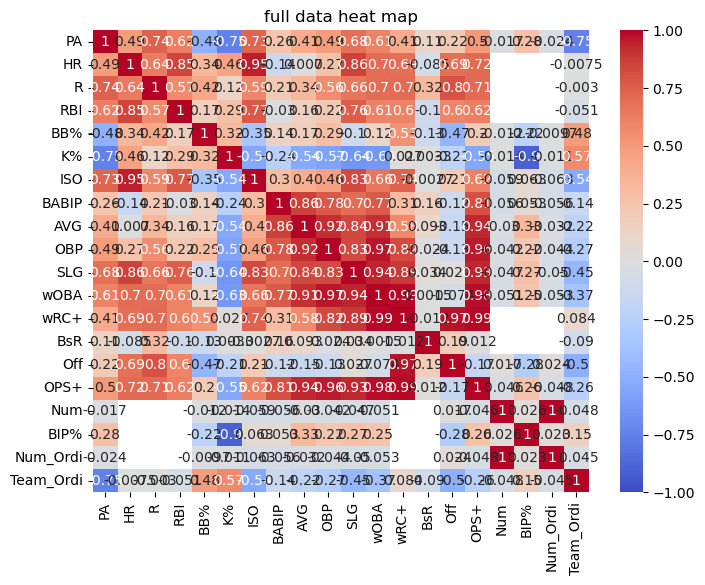

In [24]:
num_col = df.select_dtypes(include=[np.number]).columns
df_num = df[num_col]
tool.plot_heatmap(df_num, 'full data heat map')